In [15]:
import numpy as np
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

In [16]:
# simulate population
pop1_X, pop1_Y = make_regression(n_samples=100, noise=20, n_informative=1, n_features=1, random_state=1, bias=0) 
pop2_X, pop2_Y = make_regression(n_samples=100, noise=20, n_informative=1, n_features=1, random_state=1, bias=100) 
pop3_X, pop3_Y = make_regression(n_samples=100, noise=20, n_informative=1, n_features=1, random_state=1, bias=-100) 

In [17]:
# set percentage of sparseness
# x1 : 20%
# x2: 10%
# x3: 30%
indices_1 = np.random.choice(np.arange(pop1_X.size), replace=False,
                           size=int(pop1_X.size * 0.2))
pop1_X[indices_1] = 0
pop1_Y[indices_1] = 0
indices_2 = np.random.choice(np.arange(pop2_X.size), replace=False,
                           size=int(pop2_X.size * 0.1))
pop2_X[indices_2] = 0
pop2_Y[indices_2] = 0
indices_3 = np.random.choice(np.arange(pop3_X.size), replace=False,
                           size=int(pop3_X.size * 0.3))
pop3_X[indices_3] = 0
pop3_Y[indices_3] = 0

In [18]:
# combine as matrix 
pop_X = np.concatenate((pop1_X,pop2_X,pop3_X))
pop_Y = np.concatenate((pop1_Y, 2 * pop2_Y, -2 * pop3_Y))

In [19]:
# Add intercept to covariates 
pop_X = np.append(np.vstack(np.ones(len(pop_X))),pop_X,1)
pop_X.shape

(300, 2)

In [20]:
pop_Y = np.vstack(pop_Y)

## SGD with sparse streaming data

In [21]:
## parameters
n_learning_rate = 0.1 
# same prediction and cost function as before 
## Specify prediction function
def fx(theta, X):
    return np.dot(X, theta)
 
## specify cost function
def fcost(theta, X, y):
    return (1./2*len(X)) * sum((fx(theta,X) - y)**2) 

In [22]:
## specify function to calculate gradient at a given theta - returns a vector of length(theta)
# different from gradient descent method 
# not summing up the gradients 
def gradient(theta, X, y):
    grad_theta = (1./len(X)) * np.multiply((fx(theta, X)) - y, X) 
    return grad_theta

In [23]:
### DO stochastic gradient descent
# starting values for alpha & beta
theta = [0,0]

In [24]:
# store starting theta & cost
arraytheta = np.array([theta])
arraycost = np.array([])

In [25]:
# feed data through and update theta; capture cost and theta history
for i in range(0, len(pop_X)):
    
    # calculate cost for theta on CURRENT point
    cost = fcost(theta, pop_X[i], pop_Y[i])
    arraycost = np.append(arraycost, cost)
    
    # update theta with gradient descent
    theta = theta - n_learning_rate * gradient(theta, pop_X[i], pop_Y[i])
    arraytheta = np.vstack([arraytheta, theta])
 

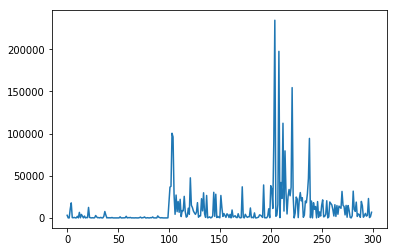

In [26]:
# plot the prediction error 
plt.plot(arraycost)